In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

In [2]:
df = sm.datasets.macrodata.load().data
df = sm.add_constant(df, prepend=False)

In [3]:
df.head(2)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,const
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,1.0
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,1.0


Suppose we want to test if real gross private domestic investment (realinv) results in a direct increase in real private disposable income (realdpi)

In [4]:
df_mod = df[['realinv','realdpi','const']]

Note that the distributions aren't normally distributed. However, that is not a requirement of linear regression. Only the residuals need to be normally distributed.

''

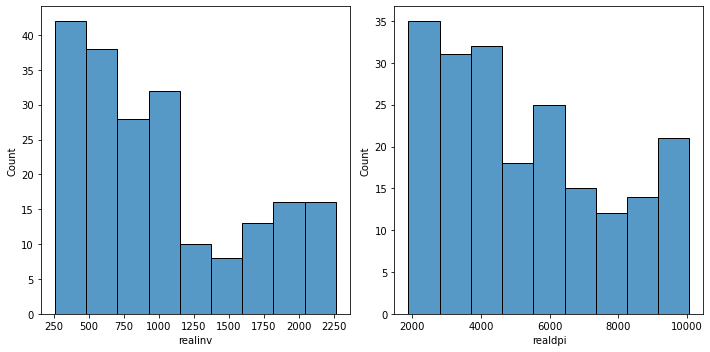

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(df_mod['realinv'], ax=ax[0])
sns.histplot(df_mod['realdpi'], ax=ax[1])

fig.tight_layout()
plt.savefig('DataInspection.png', dpi=300, facecolor='w', bbox_inches = "tight");
;

In [4]:
df_mod['realinv'] = round(df_mod['realinv'].astype('float32'), 2)

C:\Users\Pablo\AppData\Local\Temp\ipykernel_6396\1722248260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['realinv'] = round(df_mod['realinv'].astype('float32'), 2)


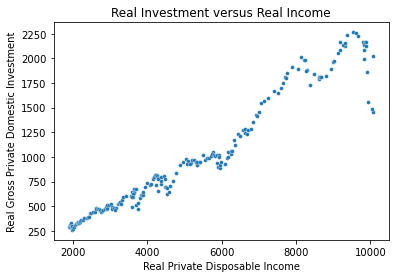

In [18]:
import seaborn as sns

fig = sns.scatterplot(x=df_mod['realdpi'], y=df_mod['realinv'], s=15)
fig.set(xlabel ="Real Private Disposable Income", ylabel = "Real Gross Private Domestic Investment", title ='Real Investment versus Real Income')
fig.figure.savefig('RealInvInc.png', dpi=300, facecolor='w', bbox_inches = "tight");

''

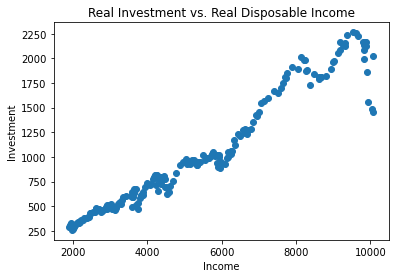

In [57]:
plt.title('Real Investment vs. Real Disposable Income')
plt.xlabel('Income')
plt.ylabel('Investment')
plt.scatter(x=df_mod['realdpi'], y=df_mod['realinv'])
plt.savefig('RealInvInc.png', dpi=300, facecolor='w', bbox_inches = "tight");
;

In [ ]:
import statsmodels.api as sm
from statsmodels.datasets.sunspots import load
data = load()
rho, sigma = sm.regression.yule_walker(data.endog, order=4, method="mle")

In [5]:
ols_model = sm.OLS(df_mod['realdpi'], df_mod[['const','realinv']])
compiled_model = ols_model.fit()

In [11]:
print(compiled_model.summary())

                            OLS Regression Results                            
Dep. Variable:                realdpi   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     3384.
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          1.01e-127
Time:                        15:25:37   Log-Likelihood:                -1577.1
No. Observations:                 203   AIC:                             3158.
Df Residuals:                     201   BIC:                             3165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1234.5164     80.866     15.266      0.0

In [38]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_mod, train_size=0.75, shuffle=True)

ols_model_train = sm.OLS(train['realdpi'], train[['const','realinv']])
compiled_model_train = ols_model_train.fit()

print(compiled_model_train.summary())

                            OLS Regression Results                            
Dep. Variable:                realdpi   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     2840.
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           2.26e-99
Time:                        15:50:31   Log-Likelihood:                -1173.1
No. Observations:                 152   AIC:                             2350.
Df Residuals:                     150   BIC:                             2356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1259.0721     89.231     14.110      0.0

In [26]:
ols_model_train = sm.OLS(train['realdpi'], train[['const','realinv']])
compiled_model_train = ols_model_train.fit()

In [34]:
from sklearn.metrics import mean_absolute_error

mse = mean_absolute_error(train['realdpi'], compiled_model_train.predict(train[['const','realinv']]))
mse

438.5872081797031

In [44]:
import numpy as np

errors = []

for i in range(len(train)):
    errors.append(abs(train['realdpi'].iloc[i] - train['realdpi'].mean()))
    
np.mean(errors)

2065.440235457064

In [36]:
train['realdpi'].mean()

5254.567105263161

In [43]:
mae_test = mean_absolute_error(test['realdpi'], compiled_model_train.predict(test[['const','realinv']]))
mae_test

408.0253171549187

In [46]:
import numpy as np

errors = []

for i in range(len(test)):
    errors.append(abs(test['realdpi'].iloc[i] - test['realdpi'].mean()))
    
np.mean(errors)

1945.5873125720873

In [35]:
test['realdpi'].mean()

5477.364705882353

In [13]:
ols_model_test = sm.OLS(test['realdpi'], test[['const','realinv']])
compiled_model_test = ols_model_test.fit()

print(compiled_model_test.summary())

                            OLS Regression Results                            
Dep. Variable:                realdpi   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1658.
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           1.91e-39
Time:                        15:32:49   Log-Likelihood:                -380.91
No. Observations:                  51   AIC:                             765.8
Df Residuals:                      49   BIC:                             769.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1212.6678    120.998     10.022      0.0

## Get model residuals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


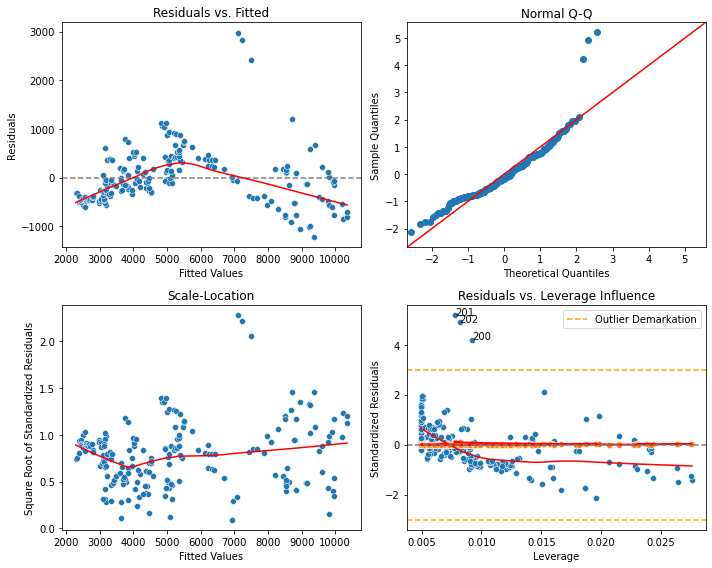

In [13]:
model_residuals = compiled_model.resid
fitted_value = compiled_model.fittedvalues
standardized_residuals = compiled_model.resid_pearson # Residuals, normalized to have unit variance.
sqrt_standardized_residuals = np.sqrt(np.abs(compiled_model.get_influence().resid_studentized_internal))
influence = compiled_model.get_influence()
leverage = influence.hat_matrix_diag
cooks_distance = compiled_model.get_influence().cooks_distance[0]

fig, ax = plt.subplots(2, 2, figsize=(10,8))

# Residual vs. Fitted
ax[0, 0].set_xlabel('Fitted Values')
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].set_title('Residuals vs. Fitted')
locally_weighted_line1 = lowess(model_residuals, fitted_value)
sns.scatterplot(x=fitted_value, y=model_residuals, ax=ax[0, 0])
ax[0, 0].axhline(y=0, color='grey', linestyle='--')
ax[0,0].plot(locally_weighted_line1[:,0], locally_weighted_line1[:,1], color = 'red')
  
# Normal Q-Q
ax[0, 1].set_title('Normal Q-Q')
sm.qqplot(model_residuals, fit=True, line='45',ax=ax[0, 1], c='blue')
  
# Scale-Location
ax[1, 0].set_xlabel('Fitted Values')
ax[1, 0].set_ylabel('Square Root of Standardized Residuals')
ax[1, 0].set_title('Scale-Location')
locally_weighted_line2 = lowess(sqrt_standardized_residuals, fitted_value)
sns.scatterplot(x=fitted_value, y=sqrt_standardized_residuals, ax=ax[1, 0])
ax[1,0].plot(locally_weighted_line2[:,0], locally_weighted_line2[:,1], color = 'red')
  
# Residual vs. Leverage Influence
ax[1, 1].set_xlabel('Leverage')
ax[1, 1].set_ylabel('Standardized Residuals')
ax[1, 1].set_title('Residuals vs. Leverage Influence')
locally_weighted_line3 = lowess(standardized_residuals, leverage)
sns.scatterplot(x=leverage, y=standardized_residuals, ax=ax[1, 1])
sns.scatterplot(x=leverage, y=cooks_distance, ax=ax[1, 1])
ax[1, 1].plot(leverage, cooks_distance, color = 'red')
ax[1, 1].plot(locally_weighted_line3[:,0], locally_weighted_line3[:,1], color = 'red')
ax[1, 1].axhline(y=0, color='grey', linestyle='--')
ax[1, 1].axhline(3, color='orange', linestyle='--', label='Outlier Demarkation')
ax[1, 1].axhline(-3, color='orange', linestyle='--')
ax[1, 1].legend(loc='upper right')

leverages = []

for i in range(len(cooks_distance)):
    if cooks_distance[i] > 0.5:
        leverages.append(leverage[i])
        ax[1, 1].annotate(str(i) + " Cook's D > 0.5",
                          xy=(leverage[i], standardized_residuals[i]))

if leverages:
    ax[1, 1].axvline(min(leverages), color='red', linestyle='--', label="Cook's Distance")

for i in range(len(standardized_residuals)):
    if standardized_residuals[i] > 3 or standardized_residuals[i] < -3:
        ax[1, 1].annotate(i,
                          xy=(leverage[i], standardized_residuals[i]))

fig.tight_layout()
plt.savefig('DiagnosticPlots.png', dpi=300, facecolor='w', bbox_inches = "tight");

Following this analysis, we may want to consider the partial autocorrelations, which are useful for finding serial correlation of the residuals. This is measured over the entire plot of time so if there is significant correlation at with the most recent point and a specific point, it means that correlation exists at that level. In the plot, we can see very strong and significant correlation between the most last data point's residual estimate and the one prior. We observe a low level of significant correlation (r = -0.25) for lag 2, extending beyond the 95% confidence interval.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


''

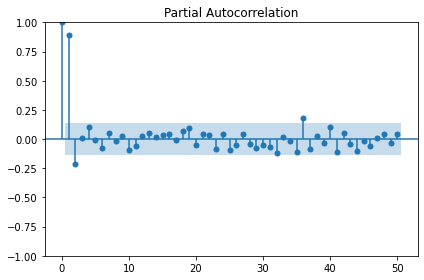

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf

fig = plot_pacf(compiled_model.resid, alpha=0.05, lags=50)
fig.tight_layout()
plt.savefig('PACF.png', dpi=300, facecolor='w', bbox_inches = "tight");

''

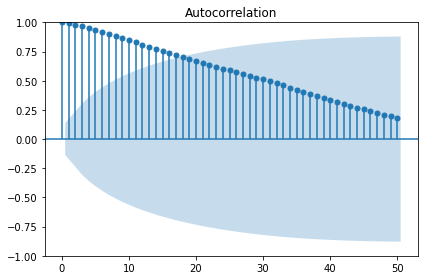

In [22]:
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_acf(df_mod['realinv'], alpha=0.05, lags=50)
fig.tight_layout()
plt.savefig('ACF.png', dpi=300, facecolor='w', bbox_inches = "tight");

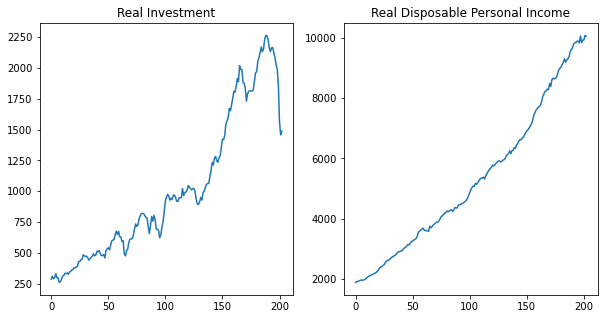

In [51]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].set_title('Real Investment')
ax[0].plot(df_mod['realinv'])
ax[1].set_title('Real Disposable Personal Income')
ax[1].plot(df_mod['realdpi'])
plt.savefig('CompareEndogExog.png', dpi=300, facecolor='w', bbox_inches = "tight");

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


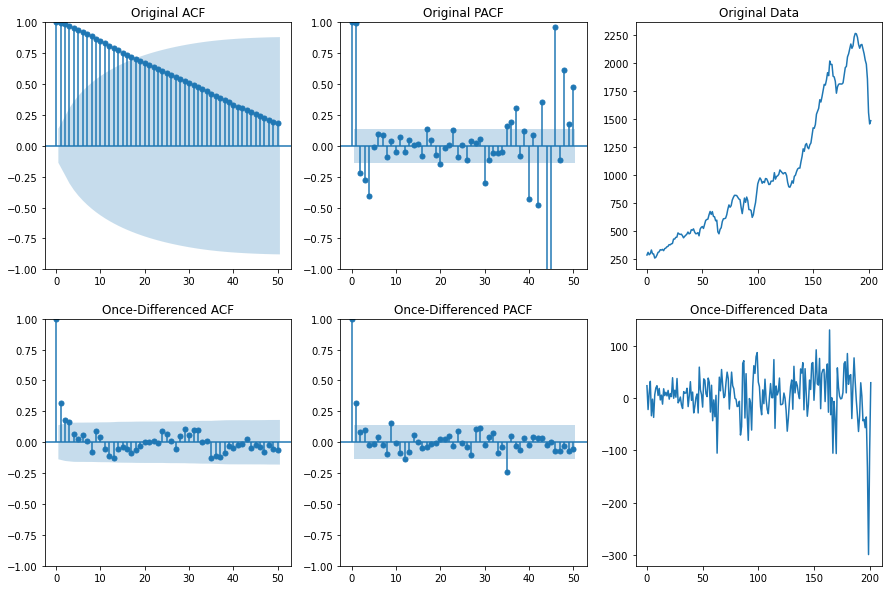

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(2,3, figsize=(15,10))
plot_acf(df_mod['realinv'], alpha=0.05, lags=50, ax=ax[0,0])
ax[0,0].set_title('Original ACF')
plot_pacf(df_mod['realinv'], alpha=0.05, lags=50, ax=ax[0,1])
ax[0,1].set_title('Original PACF')
ax[0,2].set_title('Original Data')
ax[0,2].plot(df_mod['realinv'])
plot_acf(np.diff(df_mod['realinv'], n=1), alpha=0.05, lags=50, ax=ax[1,0])
ax[1,0].set_title('Once-Differenced ACF')
plot_pacf(np.diff(df_mod['realinv'], n=1), alpha=0.05, lags=50, ax=ax[1,1])
ax[1,1].set_title('Once-Differenced PACF')
ax[1,2].set_title('Once-Differenced Data')
ax[1,2].plot(np.diff(df_mod['realinv'], n=1))
plt.savefig('DifferencingInv.png', dpi=300, facecolor='w', bbox_inches = "tight");

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


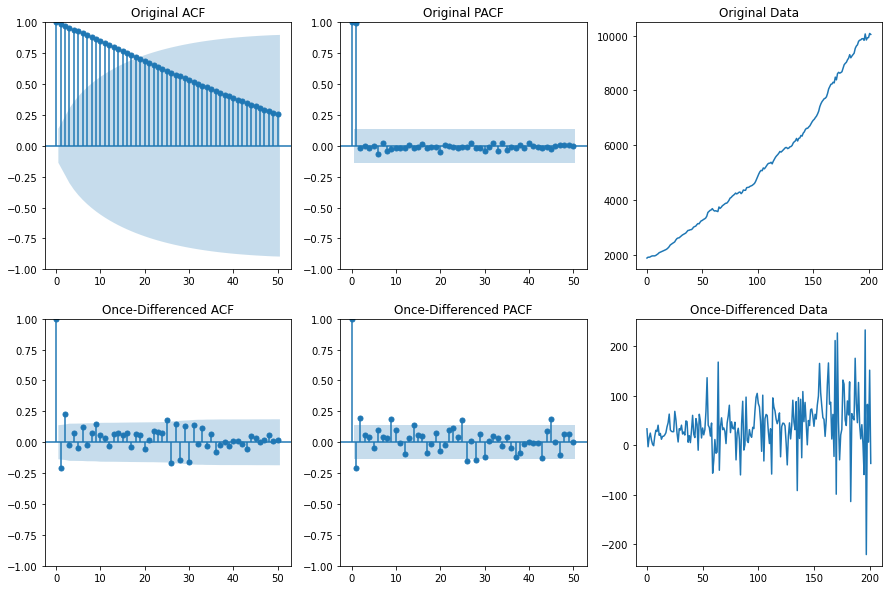

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(2,3, figsize=(15,10))
plot_acf(df_mod['realdpi'], alpha=0.05, lags=50, ax=ax[0,0])
ax[0,0].set_title('Original ACF')
plot_pacf(df_mod['realdpi'], alpha=0.05, lags=50, ax=ax[0,1])
ax[0,1].set_title('Original PACF')
ax[0,2].set_title('Original Data')
ax[0,2].plot(df_mod['realdpi'])
plot_acf(np.diff(df_mod['realdpi'], n=1), alpha=0.05, lags=50, ax=ax[1,0])
ax[1,0].set_title('Once-Differenced ACF')
plot_pacf(np.diff(df_mod['realdpi'], n=1), alpha=0.05, lags=50, ax=ax[1,1])
ax[1,1].set_title('Once-Differenced PACF')
ax[1,2].set_title('Once-Differenced Data')
ax[1,2].plot(np.diff(df_mod['realdpi'], n=1))
plt.savefig('DifferencingDPI.png', dpi=300, facecolor='w', bbox_inches = "tight");

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


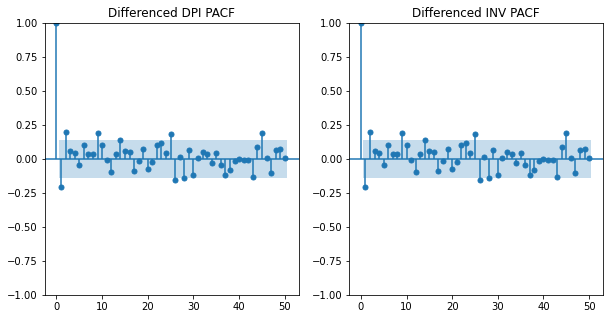

In [55]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
plot_pacf(np.diff(df_mod['realdpi'], n=1), alpha=0.05, lags=50, ax=ax[0])
ax[0].set_title('Differenced DPI PACF')
plot_pacf(np.diff(df_mod['realdpi'], n=1), alpha=0.05, lags=50, ax=ax[1])
ax[1].set_title('Differenced INV PACF')
plt.savefig('DifferencingPACF.png', dpi=300, facecolor='w', bbox_inches = "tight");

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_pacf(df_mod['realinv'], alpha=0.05, lags=50)
fig.tight_layout()
plt.savefig('ACF.png', dpi=300, facecolor='w', bbox_inches = "tight");

In [47]:
ols_model_1diff = sm.OLS(np.diff(df_mod['realdpi'], n=1), pd.concat([df_mod['const'].iloc[:-1], pd.Series(np.diff(df_mod['realinv'], n=1))], axis=1))
compiled_model_1diff = ols_model_1diff.fit()

In [48]:
compiled_model_1diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     9.438
Date:                Sun, 09 Oct 2022   Prob (F-statistic):            0.00242
Time:                        12:50:05   Log-Likelihood:                -1085.6
No. Observations:                 202   AIC:                             2175.
Df Residuals:                     200   BIC:                             2182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.8530      3.724     10.433      0.000      31.510      46.196
0              0.2546      0.083      3.072      0.002       0.091       0.418
==============================================================================
Omnibus:                       29.874   Durbin-Watson:                   2.487
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.491
Skew:                           0.193   Prob(JB):                     3.19e-41
Kurtosis:                       7.691   Cond. No.                         45.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
np.diff(df_mod['realdpi'], n=1)

array([  32.8,   -3.3,   14.9,   24.2,   10.6,    1.7,   -1.2,   17.9,
         29.9,   27.5,   40.1,   19.7,   23.5,   11.8,   17.6,   17.9,
         20.6,   24.8,   36.7,   45. ,   62.5,   30.6,   27.7,   27. ,
         27.1,   68.1,   51.5,   24.3,    6.3,   33.1,   30.4,   40.2,
         22.4,   26.3,   20.3,   48.8,   47.3,    5.8,   19.1,    5. ,
         29.5,   60. ,   22. ,   15.2,   53.4,   41.9,  -10.3,   62.2,
         48. ,   14.4,   34.5,   20.7,   31.2,   68.5,  135.9,   40.2,
         35.5,   18.2,   44.5,  -56.6,  -31.2,   11.3,  -16.4,  -14.1,
        167.4,  -50.7,   37.4,   55. ,   31.2,   34.5,   27.7,    3.1,
         44.3,   59. ,   80.4,   25.2,   47. ,   33.7,   32.7,   46.1,
        -29.8,   24.2,   34. ,   11.9,  -60.1,   43.6,   88.4,  -10. ,
          0.5,   96.8,    9. ,    5.2,   31.2,   19.8,   15.8,   35.8,
         33.3,   69.2,   96.4,  104.3,   84. ,   77.2,   47.9,  -12.5,
        100.7,  -32. ,   53.2,   61.9,   59.7,   27.8,    3.2,   32.9,
      

In [44]:
pd.concat([df_mod['const'].iloc[:-1], pd.Series(np.diff(df_mod['realdpi'], n=1))], axis=1)

,const,0
0,1.0,32.8
1,1.0,-3.3
2,1.0,14.9
3,1.0,24.2
4,1.0,10.6
...,...,...
197,1.0,-220.7
198,1.0,82.1
199,1.0,6.0
200,1.0,151.1


''

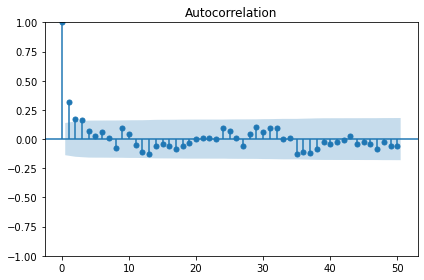

In [28]:
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_acf(np.diff(df_mod['realinv'], n=1), alpha=0.05, lags=50)
fig.tight_layout()
plt.savefig('ACF_diff.png', dpi=300, facecolor='w', bbox_inches = "tight");
;

In [14]:
import statsmodels.api as sm
from statsmodels.datasets.sunspots import load

rho, sigma = sm.regression.yule_walker(df_mod['realinv'], order=2, method="adjusted")

In [15]:
rho

array([ 1.21867343, -0.22291925])

<AxesSubplot:>

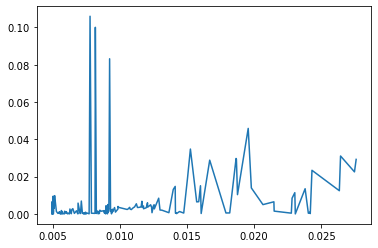

In [22]:
sns.lineplot(x=leverage, y=compiled_model.get_influence().cooks_distance[0])

<AxesSubplot:>

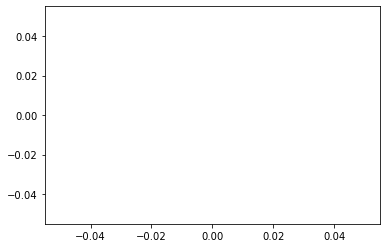

In [18]:
sns.lineplot(cooks_distance)

In [136]:
if not leverages:
    print("Not empty")

Not empty


In [16]:
compiled_model_residuals = compiled_model.resid
studentized_residuals = compiled_model.get_influence().resid_studentized_internal

compiled_model_leverage = compiled_model.get_influence().hat_matrix_diag
compiled_model_cooks_d = compiled_model.get_influence().cooks_distance[0] # cook's distance is the effect size for the residuals

compiled_model_residuals_abs = np.abs(compiled_model_residuals)
studentized_residuals_abs_sqrt = np.sqrt(np.abs(studentized_residuals))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


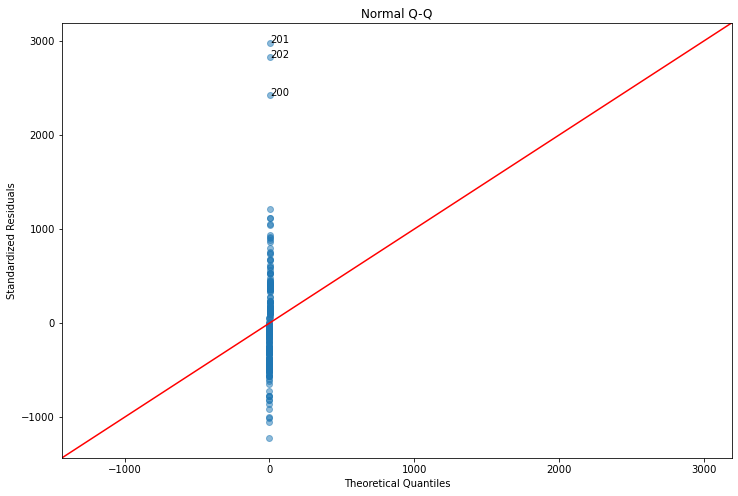

In [15]:
QQ = gofplots.ProbPlot(compiled_model_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(compiled_model_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   compiled_model_residuals[i]));

We can see from these results that the 95% confidence interval for neither the intercept (const) nor the input variable, realinv, contain zero. Therefore, in addition to the significant p-values for these variables, we can conclude they are significant contributors to the target at the coefficients provided. Now that we have confirmed there is statistical significance for both the intercept and the input variable and their coefficients, we want to know the level of correlation to the target they represent. We can see the R-squared statistic is 0.944. Because the two variables are the constant and the input variable, this R-squared explains only for the input variable. For multivariate regression, we would look at the adjusted r-squared value, which we can also see is the same - in the univariate/simple regression case - as the r-squared value. A coefficient correlation of 0.944 explains 0.944*0.944 variance in the target. Restated, a correlation of 0.944 means real private disposable income explains 89.11% of variance in the real gross private domestic investment for the years analyzed. It is important to note that there is most likely serial correlation between the target and response. This is reasonable to expect as the data is observed over a 50-year period. We can see by the Durbin-Watson statistic of 0.095, which is below 2.0, indicates strong positive autocorrelation. This means as time advanced, likely more direct investment resulted in more direct income. NOTE: a Durbin-Watson statistic below 2.0 means positive autocorrelation and a Durbin-Watson statistic above 2.0 means negative autocorrelation. A Durbin-Watson statistic of approximately 2.0 indicates there is likely no lag-one serial correlation.

In [ ]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

eval_env: 1


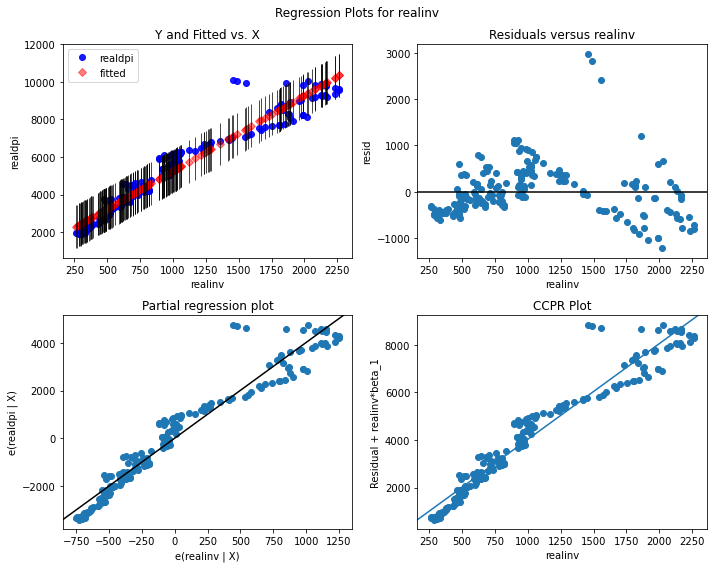

In [104]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(compiled_model, "realinv", fig=fig)
fig.tight_layout(pad=1.0)

In [89]:
df.year.max() - df.year.min()

50.0

In [ ]:
spector_data = sm.datasets.macrodata.load()
spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)

mod = sm.OLS(spector_data.endog, spector_data.exog)
res = mod.fit()
print(res.summary())

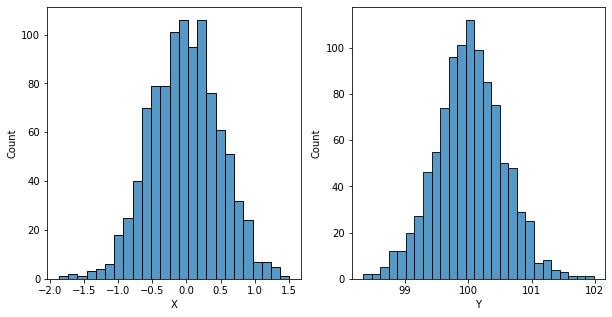

In [59]:
X_mean=0
X_stddev=0.5
X_n=1000

Y_mean=100
Y_stddev=0.5
Y_n=1000
    
df = pd.DataFrame({'X':np.random.normal(loc=X_mean, scale=X_stddev, size=X_n),
                   'Y':np.random.normal(loc=Y_mean, scale=Y_stddev, size=Y_n)})

df['constant'] = np.ones(len(df))

fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(df['X'], ax=ax[0])
sns.histplot(df['Y'], ax=ax[1]);

In [60]:
ols_model = sm.OLS(df['Y'], df[['constant','X']])
compiled_model = ols_model.fit()
compiled_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.08345
Date:                Sat, 01 Oct 2022   Prob (F-statistic):              0.773
Time:                        11:04:27   Log-Likelihood:                -788.42
No. Observations:                1000   AIC:                             1581.
Df Residuals:                     998   BIC:                             1591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant     100.0197      0.017   5929.206      0.000      99.987     100.053
X              0.0096      0.033      0.289      0.773      -0.056       0.075
==============================================================================
Omnibus:                        1.786   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.409   Jarque-Bera (JB):                1.732
Skew:                           0.034   Prob(JB):                        0.421
Kurtosis:                       3.192   Cond. No.                         1.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
X_mean=0
X_stddev=0.5
X_n=1000

Y_mean=100
Y_stddev=0.1
Y_n=1000
    
df = pd.DataFrame({'X':np.exp(np.random.normal(loc=X_mean, scale=X_stddev, size=X_n)),
                   'Y':np.random.normal(loc=Y_mean, scale=Y_stddev, size=Y_n)})

df['constant'] = np.ones(len(df))

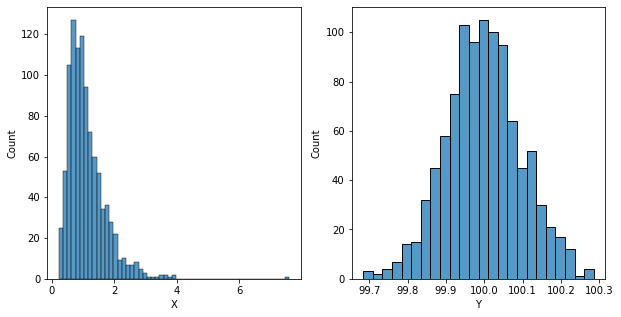

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(df['X'], ax=ax[0])
sns.histplot(df['Y'], ax=ax[1]);

In [53]:
ols_model = sm.OLS(df['Y'], df[['constant','X']])
compiled_model = ols_model.fit()
compiled_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.033
Date:                Sat, 01 Oct 2022   Prob (F-statistic):              0.154
Time:                        10:30:32   Log-Likelihood:                 900.95
No. Observations:                1000   AIC:                            -1798.
Df Residuals:                     998   BIC:                            -1788.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      99.9892      0.006   1.54e+04      0.000      99.977     100.002
X              0.0072      0.005      1.426      0.154      -0.003       0.017
==============================================================================
Omnibus:                        0.551   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.453
Skew:                           0.043   Prob(JB):                        0.797
Kurtosis:                       3.059   Cond. No.                         4.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""